<a href="https://colab.research.google.com/github/UzmaMahmoodSSUET/bootcamp_datasci/blob/main/lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras import layers
from keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/lung_cancer_dataset/training",
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 440 images belonging to 2 classes.


In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=30)

In [ ]:
test_generator = test_datagen.flow_from_directory(
                                '/content/drive/MyDrive/lung_cancer_dataset/test',
                                target_size=(150,150),
                                batch_size=20,
                                class_mode='binary')

Found 94 images belonging to 2 classes.


In [ ]:
model.evaluate(test_generator)

5/5 [==============================] - 2s 402ms/step - loss: 0.3272 - acc: 0.9043


[0.3271648585796356, 0.9042553305625916]

In [ ]:
y_pred = model.predict(test_generator)
y_pred


In [ ]:
y_pred = [1 if y>0.5 else 0 for y in y_pred]
y_pred

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
report = classification_report(test_labels, (y_pred))
print(report)

              precision    recall  f1-score   support

           0       0.54      0.62      0.57        47
           1       0.55      0.47      0.51        47

    accuracy                           0.54        94
   macro avg       0.54      0.54      0.54        94
weighted avg       0.54      0.54      0.54        94



In [49]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

<Axes: >

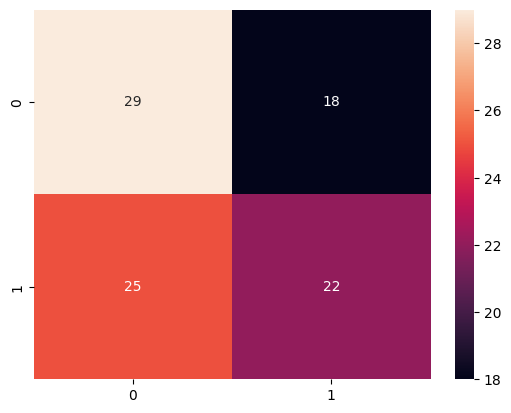

In [ ]:
confusion = confusion_matrix(test_labels, y_pred)
confusion
import seaborn as sns
sns.heatmap(confusion, annot=True)

In [50]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [51]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [52]:
base_dir = '/content/drive/MyDrive/lung_cancer_dataset'
train_dir = "/content/drive/MyDrive/lung_cancer_dataset/training"
test_dir = "/content/drive/MyDrive/lung_cancer_dataset/test"
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [56]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(directory,target_size=(150, 150),batch_size=batch_size,class_mode='binary')
  i=0
  for inputs_batch, labels_batch in generator:
      features_batch = conv_base.predict(inputs_batch)
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i += 1
      if i * batch_size >= sample_count:
        break
  return features, labels

In [57]:
train_features, train_labels = extract_features(train_dir, 440)
test_features, test_labels = extract_features(test_dir, 94)

Found 440 images belonging to 2 classes.
1/1 [==============================] - 5s 5s/step
Found 94 images belonging to 2 classes.
1/1 [==============================] - 4s 4s/step


In [59]:
rain_features = np.reshape(train_features, (440, 4 * 4 * 512))
test_features = np.reshape(test_features, (94, 4 * 4 * 512))

In [64]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,epochs=20,batch_size=20)

Epoch 1/20


ValueError: ignored